# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [21]:
import pandas as pd
import os
os.getcwd()
os.chdir("D:\IMLP 398 ivytsai5117\data")
os.getcwd()
os.path.isfile("grades.csv")
os.chdir("..")
os.getcwd()

'D:\\IMLP 398 ivytsai5117'

In [62]:
df = pd.read_csv("data/grades.csv")
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [27]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [30]:
df.columns
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [9]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

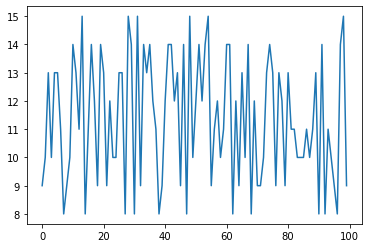

In [10]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

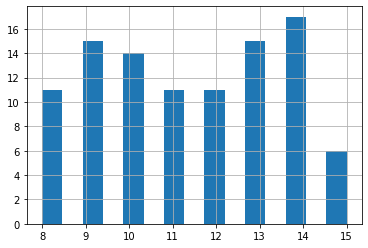

In [11]:
df.國文.hist(bins =15)

## 3 一些基本的資料分析

算平均。

In [35]:

print("國文的平均 {}".format(df.國文.mean()))

國文的平均 11.39


算標準差。

In [36]:

print("國文的標準差 {}".format(df.國文.std()))

國文的標準差 2.1968526614594834


不如就該算的都幫我們算算...

In [37]:
print("國文的描述性統計 {}".format(df.國文.describe()))

國文的描述性統計 count    100.000000
mean      11.390000
std        2.196853
min        8.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       15.000000
Name: 國文, dtype: float64


有時我們很愛看的相關係數矩陣。

只算兩科間的相關係數當然也可以。

In [38]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [63]:
df["total"] = df.sum(axis = 1)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14296\3035550643.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["total"] = df.sum(axis = 1)


,姓名,國文,英文,數學,自然,社會,total
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [64]:
df["加權"] = df.國文 + df.英文 + df.數學*2
df

,姓名,國文,英文,數學,自然,社會,total,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [48]:
df.sort_values(by = 'total', ascending = True)

,姓名,國文,英文,數學,自然,社會,total,加權
18,梁慧君,9,8,8,8,12,135,33
7,林金鳳,8,9,10,10,8,135,37
1,胡玉華,10,10,10,8,9,141,40
32,林建亨,9,11,8,8,11,141,36
93,李曼夢,11,9,11,8,8,141,42
...,...,...,...,...,...,...,...,...
64,俞志峰,9,14,13,14,15,195,49
54,陳怡潔,15,15,9,15,11,195,48
57,胡淳茜,12,15,14,13,11,195,55
12,李正偉,11,15,11,14,15,198,48


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [81]:
df2 = df.sort_values(by = ["加權","total"], ascending = False)
df2.head()

,姓名,國文,英文,數學,自然,社會,total,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54


### 【重點】重設 index

In [82]:
df2.index = range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,total,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [87]:
math_100 = df[df.數學 == 15]
math_100

,姓名,國文,英文,數學,自然,社會,total,加權
0,劉俊安,9,10,15,10,13,57,49
24,陳竹伯,10,12,15,10,14,61,52
36,詹威德,12,13,15,10,14,64,55
37,曾怡君,11,12,15,13,14,65,53
39,段冠廷,9,8,15,12,15,59,47
59,芮秋辛,11,10,15,10,8,54,51
67,林哲法,14,9,15,10,14,62,53
70,葉儀依,9,13,15,8,14,59,52
73,吳志遠,13,15,15,8,8,59,58
76,周育霖,9,12,15,13,12,61,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [88]:
math_english_100 = df[(df.數學 == 15) & (df.英文 == 15)]
math_english_100

,姓名,國文,英文,數學,自然,社會,total,加權
73,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [91]:
df3 = df.drop("total", axis =1) 
df3
df

,姓名,國文,英文,數學,自然,社會,total,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [92]:
df3.drop("加權", axis =1) 

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [94]:
df4 = df.copy()

In [95]:
df4.drop(1)

,姓名,國文,英文,數學,自然,社會,total,加權
0,劉俊安,9,10,15,10,13,57,49
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
5,張雅岳,13,12,12,12,8,57,49
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [99]:
df5 = df.copy()

In [104]:
df5[df5.國文 == 15]

,姓名,國文,英文,數學,自然,社會,total,加權
13,黃旭忠,15,14,9,12,10,60,47
28,王金鳳,15,14,8,12,8,57,45
31,林秀娟,15,12,9,9,15,60,45
48,陳怡婷,15,14,12,9,15,65,53
54,陳怡潔,15,15,9,15,11,65,48
98,李明威,15,9,8,9,15,56,40


In [106]:
df5.drop(df5[df5.國文 ==15].index)

,姓名,國文,英文,數學,自然,社會,total,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
94,林與忠,10,9,10,11,15,55,39
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [1]:
!!pip install yfinance
import yfinance as yf
df = yf.download('AAPL')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

#### 只要最後 300 個交易日!

In [22]:
#df2 = df.sort_values(by = "Date", ascending =True)
#df2.head(300)
#df2[-300:]

df3 = df.sort_values(by = "Date", ascending =False)
df3[:300]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58333200
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600
2023-09-15,176.479996,176.500000,173.820007,175.009995,175.009995,109205100
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800
...,...,...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000,149.901260,82982400
2022-07-18,150.740005,151.570007,146.699997,147.070007,145.999878,81420900
2022-07-15,149.779999,150.860001,148.199997,150.169998,149.077316,76259900


#### 20 日的移動平均

<Axes: xlabel='Date'>

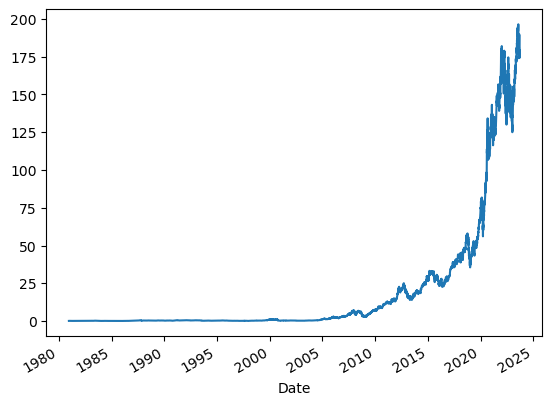

In [30]:
df2.Close.plot()


<Axes: xlabel='Date'>

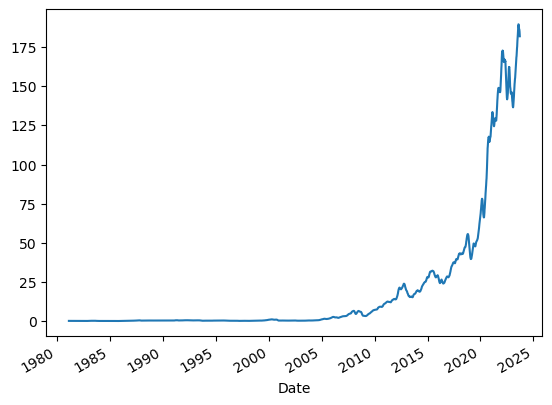

In [29]:
df2.Close.rolling(40).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

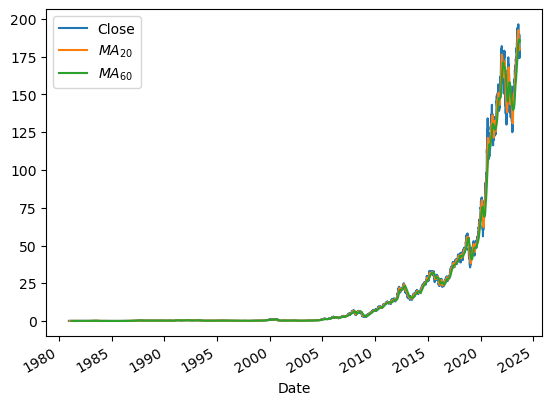

In [31]:
df2.Close.plot(legend=True)
df2.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df2.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [36]:
close = df2.Close.values
len(close)

10783

In [39]:
x = close[:-1]
len(x)

10782

In [40]:
y = close[1:]
len(y)

10782

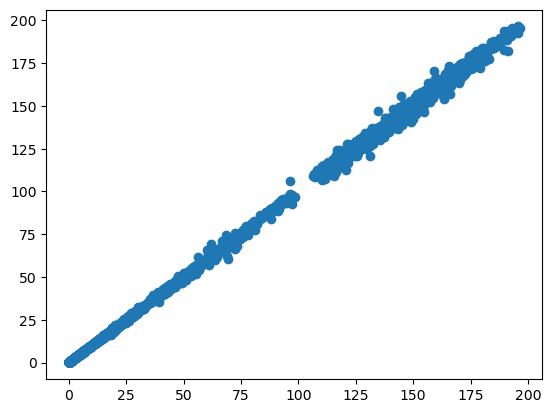

In [41]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [43]:

mydata = np.random.randn(4,3)


In [44]:
mydata

array([[ 0.34967827, -1.79786685,  0.6730326 ],
       [-0.7148266 , -0.43200585,  1.72636086],
       [-0.3486283 ,  0.34859191,  1.96969921],
       [ 0.04654072, -0.02582432,  1.51632194]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [45]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [46]:
df2

,A,B,C
0,0.349678,-1.797867,0.673033
1,-0.714827,-0.432006,1.726361
2,-0.348628,0.348592,1.969699
3,0.046541,-0.025824,1.516322


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [47]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [50]:
df3

,A,B,C
0,1.572055,-1.676687,0.385170
1,0.139710,-0.311209,1.101006
2,-2.063493,1.129167,-0.988007


In [56]:
df41 = pd.concat([df2, df3], axis=1)
df4 = pd.concat([df2, df3], axis=0)

In [61]:
df4.index = range(len(df4.A))
df4

,A,B,C
0,0.349678,-1.797867,0.673033
1,-0.714827,-0.432006,1.726361
2,-0.348628,0.348592,1.969699
3,0.046541,-0.025824,1.516322
4,1.572055,-1.676687,0.385170
5,0.139710,-0.311209,1.101006
6,-2.063493,1.129167,-0.988007


前面我們弄得亂七八糟的 index 重設一下。

#### 横向的貼

In [62]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [63]:
df5

,A,B,C,A,B,C
0,0.349678,-1.797867,0.673033,1.572055,-1.676687,0.385170
1,-0.714827,-0.432006,1.726361,0.139710,-0.311209,1.101006
2,-0.348628,0.348592,1.969699,-2.063493,1.129167,-0.988007
3,0.046541,-0.025824,1.516322,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [64]:
df_names = pd.read_csv("data/names.csv", names =["姓名"])

In [65]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [66]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [67]:
df_grades.head()

,國文,英文,數學,社會,自然
0,15,6,11,13,10
1,9,9,11,8,14
2,15,6,6,8,8
3,7,9,11,14,10
4,15,6,11,11,10


In [68]:
df_grades

,國文,英文,數學,社會,自然
0,15,6,11,13,10
1,9,9,11,8,14
2,15,6,6,8,8
3,7,9,11,14,10
4,15,6,11,11,10
...,...,...,...,...,...
95,13,13,9,11,9
96,13,8,14,11,14
97,14,14,12,8,10
98,11,12,6,15,7


In [69]:
df_score = pd.concat([df_names,df_grades], axis= 1)

In [70]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,6,11,13,10
1,王紹尹,9,9,11,8,14
2,黃季坤,15,6,6,8,8
3,許正書,7,9,11,14,10
4,張鈞蓮,15,6,11,11,10
...,...,...,...,...,...,...
95,陳君生,13,13,9,11,9
96,曾桂甫,13,8,14,11,14
97,林欣怡,14,14,12,8,10
98,林佳霖,11,12,6,15,7
